# Методы машинного обучения, МИЭМ ВШЭ

## Семинар 1. Разновидности данных и типы задач машинного обучения

На лекции мы обсуждали, что наиболее распространенными задачами машинного обучения являются классификация и регрессия. Но жизнь, как водится, богаче книги, и для каждого домена данных существует множество специфичных задач, которые с разной степенью успешности решаются специалистами в сфере МО.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Синтетические/геометрические данные

- Мы точно знаем все зависимости между целевой переменной и признаками, посколько задаем их сами
- Хорошо подходят для визуализации работы алгоритмов

**Внимание!** Образец хорошего оформления графика.

<ipython-input-4-bf1c19d36d42>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  axs[1].figure.colorbar(sm, label='target')


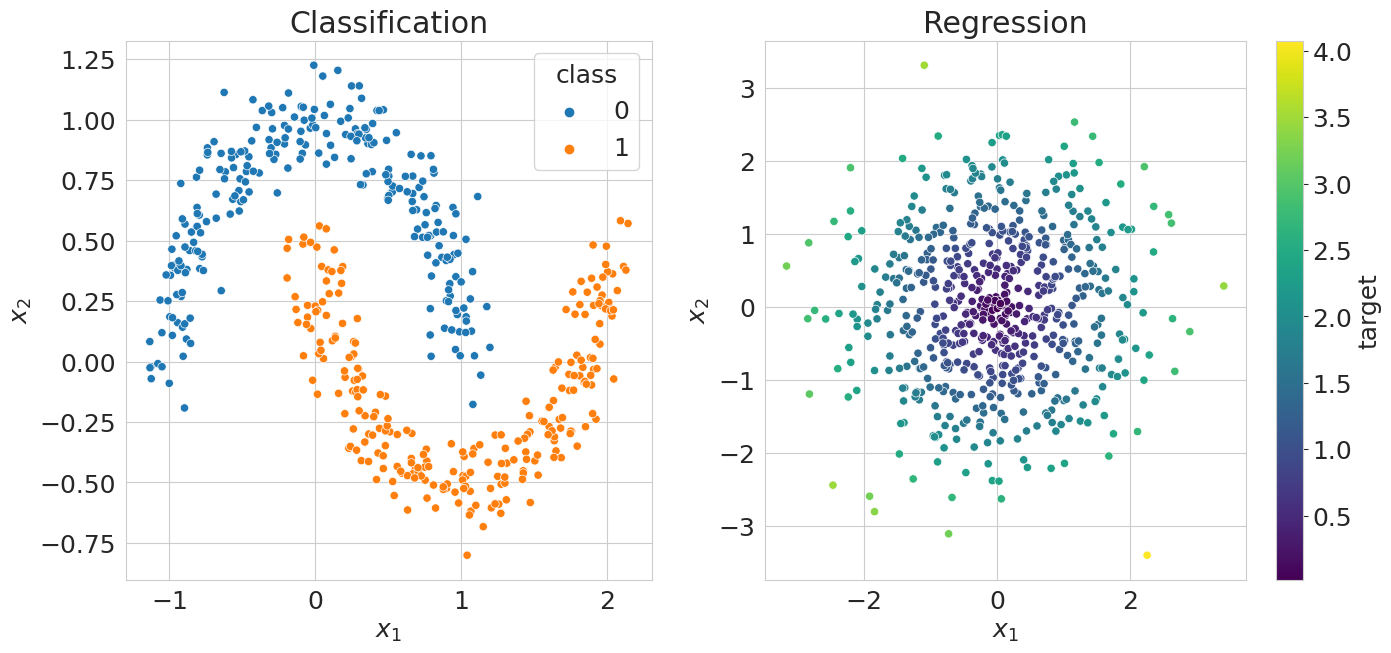

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(600, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, label='target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

Примеры кластеризации на синтетических данных: https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png

## Табличные данные

Конечно, мы могли бы взять любые данные и представить их в качестве таблицы, но здесь речь идет о канонически табличных данных, когда все признаки имеют разную природу и в каком-то смысле являются отдельными, "осмысленными" измерениями.
- Это один из самых распространненых типов данных, и в курсе МО 90% времени мы будем работать с таблицами
- Обычно признаки делятся на вещественные и категориальные.

Boston dataset: http://lib.stat.cmu.edu/datasets/boston

In [ ]:
from sklearn.datasets import load_boston

X = load_boston()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

ImportError: ignored

## Изображения

Направление машинного обучения, которое имеет дело с изображениями, называется компьютерным зрением (Computer Vision, CV). Как правило, изображения представляют в виде тензоров размерности $(H, W, C)$, где обычно $C = 3$. Содержание тензора зависит от цветового пространства, чаще всего используется RGB.

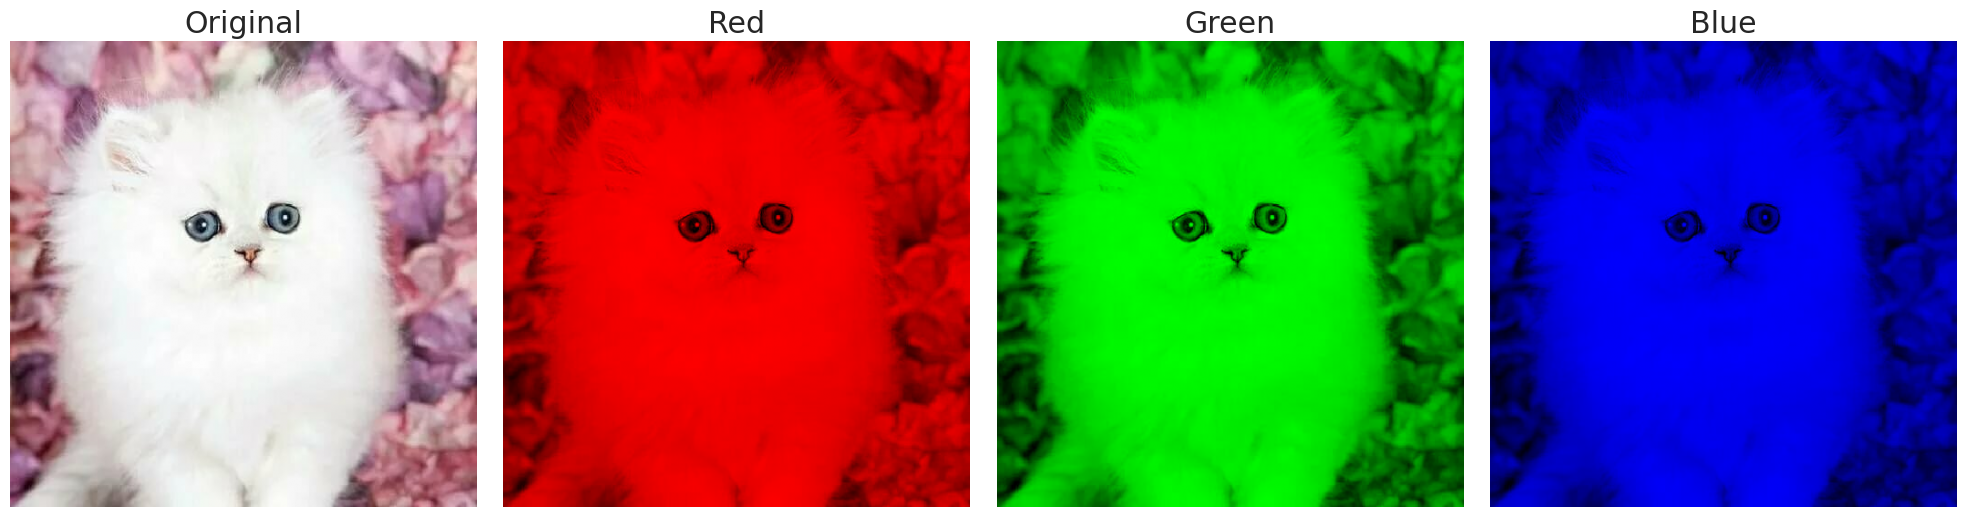

In [ ]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('https://avatars.mds.yandex.net/get-pdb/2062817/9c0daa3c-f644-41a7-b9d8-bf2356fa687d/s1200?webp=false'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

Иногда используют и другие цветовые пространства, например, Lab (канал светлоты и два цветовых канала).

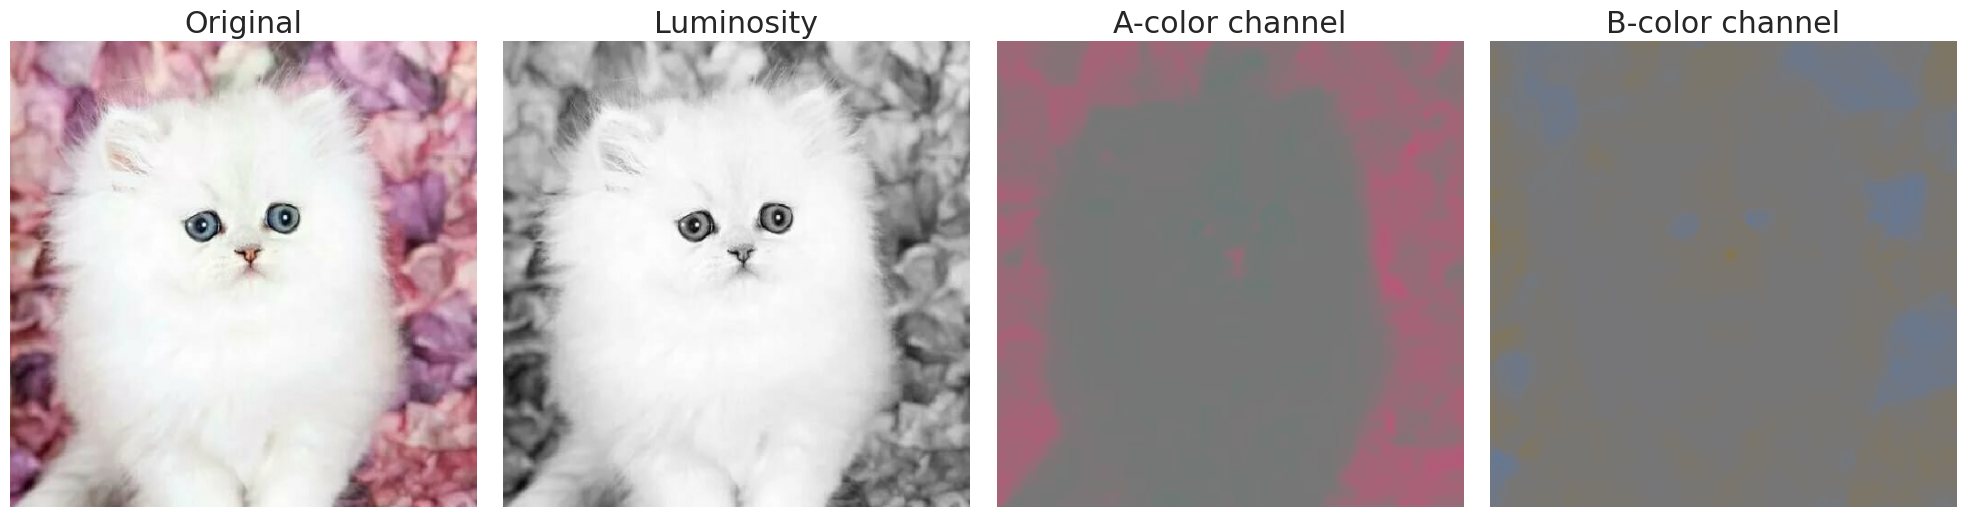

In [ ]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Задачи:

**Классификация (classification)** (ImageNet, CIFAR-10/100, MNIST)


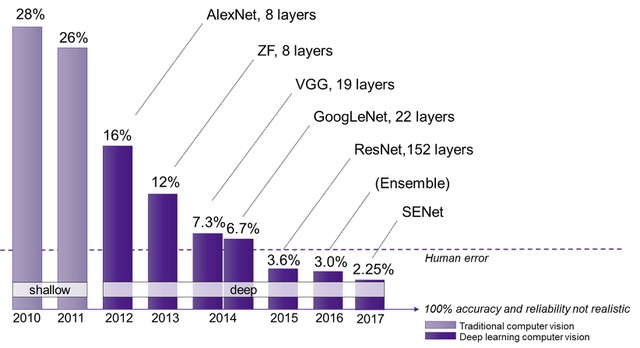

**Семантическая сегментация (semantic segmentation)** (PASCAL VOC, Cityscapes)


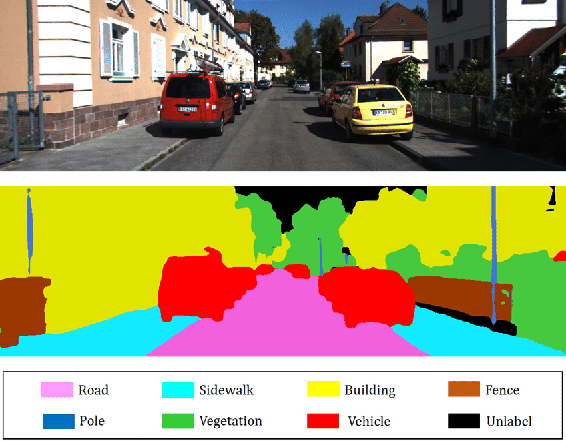

**Детекция объектов (object detection)** (COCO, PASCAL VOC)


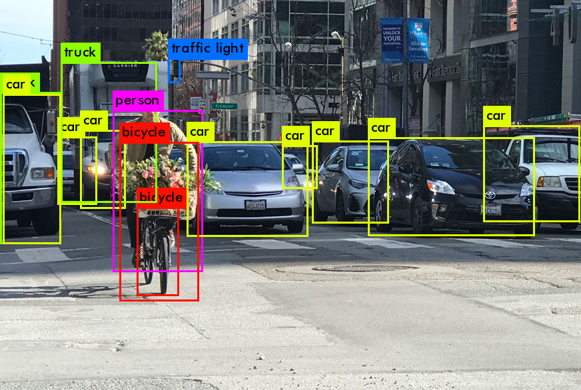

И многие-многие другие, такие как **оценка позы (pose estimation)**, **реконструкция сцены (scene reconstruction)** и т.д.

Также встречаются разного рода генеративные задачи, такие как **перенос стиля (style transfer)** или **повышение разрешения (super-resolution)**.


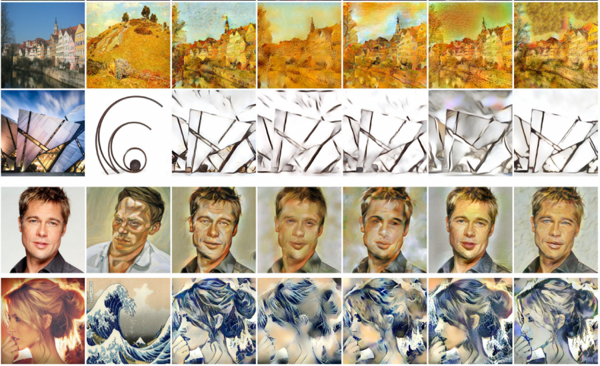

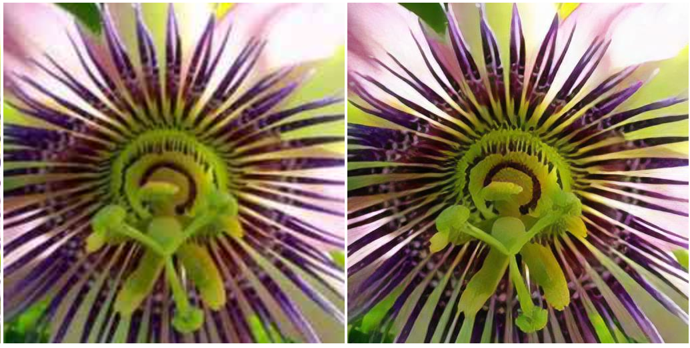

## Текстовые данные

Обработка естественного языка (Natural Language Processing, NLP) - одно из наиболее востребованных направлений в машинном обучении. Зачастую методы из NLP перекочевывают в другие домены данных и находят там успешное применение. Основными особенностями текстовых данных являются, во-первых, их дискретность, а во-вторых, последовательная структура. Как правило, при работе с текстом его токенизируют (по символам, по словам или по сочетаниям символов -- так называемый byte-pair-encoding, BPE), а затем каждому токену присваивается некоторый вектор-эмбеддинг. Такое преобразование позволяет обрабатывать дискретные данные непрерывными моделями.

В последнее время также развиваются инструменты работы с данными, которые похожи на тексты, но таковыми не являются. Например, появляются новые задачи и данные, связанные с обработкой программного кода.

## Задачи:

- **Машинный перевод (machine translation)** (WMT, IWSLT)
- **Обобщение текста (text summarization)** (GigaWord, arXiv)
- **Моделирование языка (language modelling)** (WikiText)
- **Генерация текста (text generation)** (MATH, COCO Captions)
- **Ответы на вопросы (question answering)** (SQuAD, WikiQA)
- **Определение части речи (part-of-speech tagging, POS)** (Penn Treebank)
- **Анализ эмоциональной окраски (sentiment analysis)** (SST, IMDb, Yelp)


## Аудио

Аудиозаписи часто представляют как последовательность вещественных чисел из промежутка $[-1, 1]\,$ (wav-формат). Такие аудио могут быть как одноканальными, так и многоканальными. При работе с музыкой популярен MIDI-формат. Но наиболее часто встречаются спектрограммы -- результат применения к звуковой волне преобразования Фурье или его вариаций.

In [ ]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('nutcracker'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)


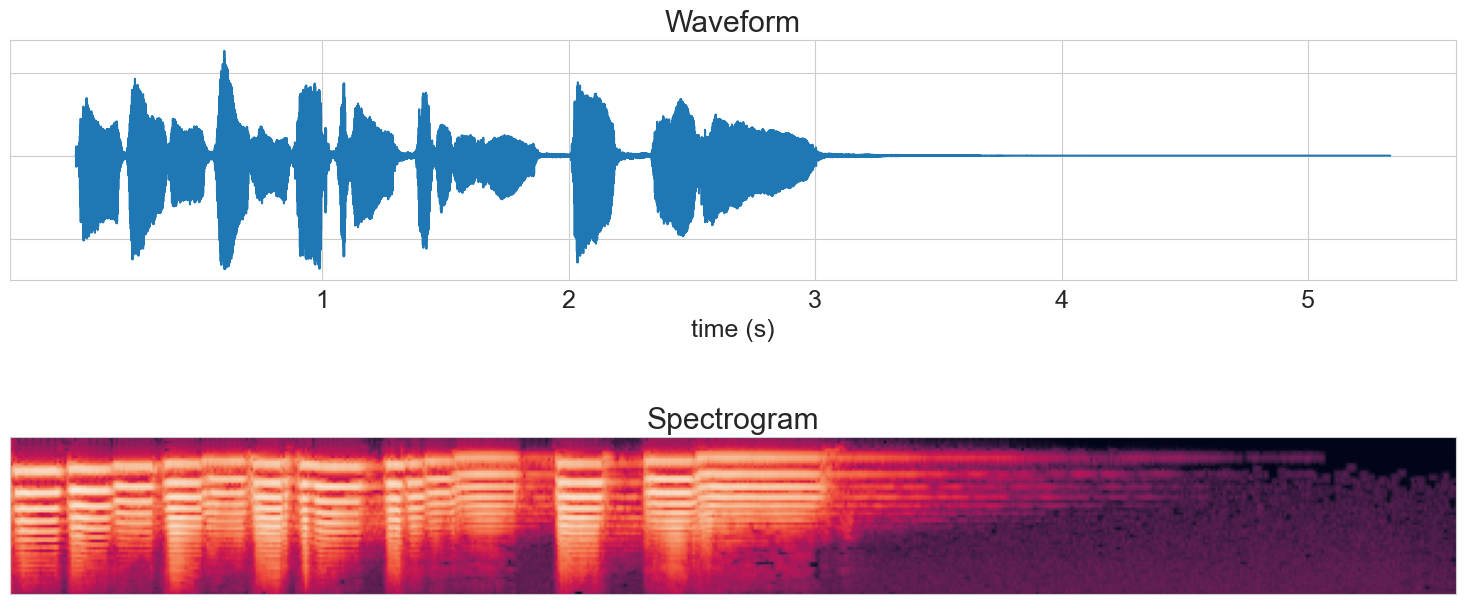

In [ ]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')

axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

In [ ]:
print(waveform)
n_fft = 2048
ft = np.abs(librosa.stft(waveform[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

tensor([-1.4068e-03, -4.4608e-04, -4.1098e-04,  ...,  7.9623e-06,
        -3.0417e-05,  1.2765e-05])


ParameterError: Audio data must be of type numpy.ndarray

### Задачи

- **Распознавание речи (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Синтез речи (text-to-speech, tts)**
- **Генерация музыки (music generation)**
- **Устранение шумов, улучшение речи (denoising, speech enhancement)**
- **Распознавание ключевых слов (keyword spotting, kws)**

## Видео

Работа с видео-файлами похожа на работу с изображениями: к 2 пространственным размерностям и размерности цветовых каналов добавляется время. Иногда в контексте видео рассматривают и звуковую дорожку. В целом, для видео актуальны все те же задачи, что и для изображений, с поправкой на наличие изменений сцены во времени. Среди специфичных задач можно упомянуть **optical flow** (отслеживание движения пикселей на кадрах) и **object tracking** (отслеживание движущихся объектов).



In [ ]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Графовые данные

Иногда данные имеют явную или неявную графовую структуру (например, молекулы как графы атомов или профили в социальных сетях), и при обработке было бы полезно использовать это дополнительное знание. Задачи на графах можно разделить на два типа:

1. Задачи на уровне вершин (например, определение социальной роли)
2. Задачи на уровне графов (например, классификация молекул)

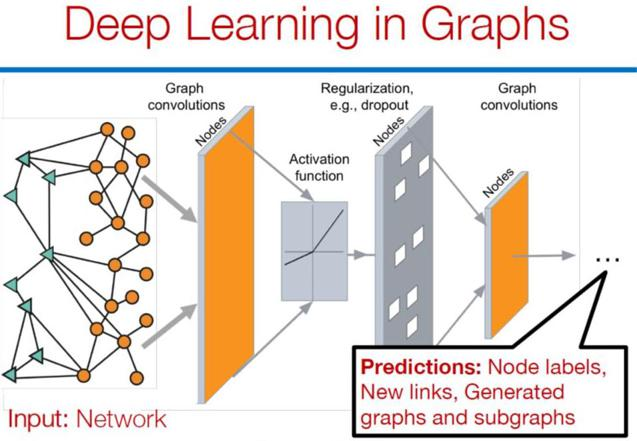

## Многодоменные задачи

Совершенствование моделей машинного обучения и рост вычислительных мощностей привели к появлению задач, затрагивающих несколько доменов данных. Вспомним задачи обработки звука: распознавание и синтез речи, по сути, представляют собой перевод из звукового домена в текстовый и обратно. Существуют примеры комбинирования текста и изображений: это Visual Question Answering (VQA) -- ответы на вопросы по изображению или text-to-image generation -- генерация изображения по текстовому запросу. Подобные задачи решаются с помощью очень больших и сложных моделей, а также требуют огромного числа данных и вычислительного бюджета. Здесь же можно вспомнить про беспилотники, которые так же обрабатывают данные очень разной природы.

# Знакомство с jupyter

Документ jupyter notebook имеет расширение .ipynb, состоит из множества ячеек. В ячейках можно писать программный код, делать размеченные и неразмеченные заметки. Этим функциям соответствует три типа ячеек:
    
    1. code
    2. markdown
    3. raw

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**).

Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

In [ ]:
# Ячейка с кодом
a = 1

## Ячейка с размеченным текстом

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

Ячейки с программным кодом разделяют область видимости:

In [ ]:
a = 1

In [ ]:
print(a)

1


# Пара слов о вёрстке
[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать
##заголовки
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

Можно также вставлять изображения:
<img src = "http://cs625727.vk.me/v625727306/3e600/rEqFs3UK3-s.jpg">

# NumPy

**NumPy** — библиотека языка Python, позволяющая [удобно] работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении.

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [ ]:
import numpy as np

Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

In [ ]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей

1

In [ ]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

2

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [ ]:
vec.shape

(3,)

Чтобы узнать тип элементов и их размер в байтах:

In [ ]:
mat.dtype.name

'int64'

In [ ]:
mat.itemsize

8

## Создание массивов

* Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [ ]:
A = np.array([1, 2, 3])
A

array([1, 2, 3])

In [ ]:
A = np.array([1, 2, 3], dtype = float)
A

array([ 1.,  2.,  3.])

In [ ]:
B = np.array([(1, 2, 3), (4, 5, 6)])
B

array([[1, 2, 3],
       [4, 5, 6]])

* Создание массивов специального вида при помощи функций zeros, ones, empty, identity:

In [ ]:
np.zeros((3,))

array([ 0.,  0.,  0.])

In [ ]:
np.ones((3, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [ ]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
np.empty((2, 5))

array([[  1.72723371e-077,   2.68679363e+154,   2.22586790e-314,
          2.22594686e-314,   2.22594008e-314],
       [  2.22598140e-314,   2.22236417e-314,   0.00000000e+000,
          2.22024022e-314,   6.95337803e-309]])

Обратите внимание, что содержимое массива, созданного при помощи функции empty, **не инициализируется**, то есть в качестве значений он **может содержать "мусор"**.

* Создание последовательностей при помощи функций arange (в качестве парметров принимает левую и правую границы последовательности и **шаг**) и linspace (принимает левую и правую границы и **количество элементов**):

In [ ]:
np.arange(2, 20, 3) # аналогично стандартной функции range python, правая граница не включается

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
np.arange(2.5, 8.7, 0.9) # но может работать и с вещественными числами

array([ 2.5,  3.4,  4.3,  5.2,  6.1,  7. ,  7.9])

In [ ]:
np.linspace(2, 18, 14) # правая граница включается (по умолчанию)

array([  2.        ,   3.23076923,   4.46153846,   5.69230769,
         6.92307692,   8.15384615,   9.38461538,  10.61538462,
        11.84615385,  13.07692308,  14.30769231,  15.53846154,
        16.76923077,  18.        ])

* Для изменения размеров существующего массива можно воспользоваться функцией reshape (при этом количество элементов должно оставаться неизменным):

In [ ]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [ ]:
np.arange(8).reshape(2, -1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

* Транспонирование существующего массива:

In [ ]:
C = np.arange(6).reshape(2, -1)
C

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
C.T

array([[0, 3],
       [1, 4],
       [2, 5]])

* Объединение существующих массивов по заданной оси:

In [ ]:
A = np.arange(6).reshape(2, -1)
print(A)
print(A**2)
np.hstack((A, A**2))

[[0 1 2]
 [3 4 5]]
[[ 0  1  4]
 [ 9 16 25]]


array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

In [ ]:
np.vstack((A, A**2))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0,  1,  4],
       [ 9, 16, 25]])

In [ ]:
np.concatenate((A, A**2), axis = 1)

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

* Повторение существующего массива

In [ ]:
a = np.arange(3)
np.tile(a, (2, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [ ]:
np.tile(a, (1, 2))

array([[0, 1, 2, 0, 1, 2]])

## Базовые операции

* Базовые арифметические операции над массивами выполняются поэлементно:

In [ ]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [ ]:
print(A)
print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [ ]:
A * 1.0 / B

array([[ 0.        ,  0.5       ,  0.66666667],
       [ 0.75      ,  0.8       ,  0.83333333],
       [ 0.85714286,  0.875     ,  0.88888889]])

In [ ]:
A + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
3 * A

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [ ]:
A ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [ ]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Для выполнения матричного умножения необходимо использовать функцию dot:

In [ ]:
A.dot(B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):
<img src = "http://www.scipy-lectures.org/_images/numpy_broadcasting.png">

In [ ]:
np.tile(np.arange(0, 40, 10), (3, 1)).T + np.array([0, 1, 2])

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

* Универсальные функции (sin, cos, exp и т.д.) также применяются поэлементно:

In [ ]:
np.exp(A)

array([[  1.00000000e+00,   2.71828183e+00,   7.38905610e+00],
       [  2.00855369e+01,   5.45981500e+01,   1.48413159e+02],
       [  4.03428793e+02,   1.09663316e+03,   2.98095799e+03]])

* Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [ ]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
A.min()

0

In [ ]:
A.max(axis = 0)

array([6, 7, 8])

In [ ]:
A.sum(axis = 1)

array([ 3, 12, 21])

## Индексация

Для доступа к элементам может использоваться [много различных способов](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), рассмотрим основные.

* Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a[2:5]

array([2, 3, 4])

In [ ]:
a[3:8:2]

array([3, 5, 7])

In [ ]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [ ]:
A[2:4]

array([[18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [ ]:
A[:, 2:4]

array([[ 2,  3],
       [11, 12],
       [20, 21],
       [29, 30],
       [38, 39],
       [47, 48],
       [56, 57],
       [65, 66],
       [74, 75]])

In [ ]:
A[2:4, 2:4]

array([[20, 21],
       [29, 30]])

In [ ]:
A[-1]

array([72, 73, 74, 75, 76, 77, 78, 79, 80])

* Также может использоваться индексация при помощи списков индексов (по каждой из осей):

In [ ]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [ ]:
A[[2, 4, 5], [0, 1, 3]]

array([18, 37, 48])

* Может также применяться логическая индексация (при помощи логических массивов):

In [ ]:
A = np.arange(11)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
A[A % 5 != 3]

array([ 0,  1,  2,  4,  5,  6,  7,  9, 10])

In [ ]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

array([ 0,  1,  2,  4,  5,  6,  9, 10])

## Примеры

In [ ]:
A = np.arange(120).reshape(10, -1)
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

1. Выбрать все четные строки матрицы A.
2. Составить одномерный массив из всех не делящихся на 3 элементов нечетных столбцов А.
3. Посчитать сумму диагональных элементов A.

In [ ]:
# Your code here

## Зачем?

Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать сумму поэлементых произведений 2 больших векторов:

In [ ]:
import time

A_quick_arr = np.random.normal(size = (1000000,))
B_quick_arr = np.random.normal(size = (1000000,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [ ]:
start = time.clock()
ans = 0
for i in xrange(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]
print(time.clock() - start) # время выполнения в секундах

0.310231


In [ ]:
start = time.clock()
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(1000000)])
print(time.clock() - start)

0.322319


In [ ]:
start = time.clock()
ans = np.sum(A_quick_arr * B_quick_arr)
print(time.clock() - start)

0.005845


In [ ]:
start = time.clock()
ans = A_quick_arr.dot(B_quick_arr)
print(time.clock() - start)

0.003035


# Pandas

<img src = "http://bconnelly.net/assets/img/pandas1.png">

In [ ]:
import pandas as pd
%matplotlib inline

**Pandas** (Python Data Analysis Library) — библиотека языка Python для [удобных] обработки и анализа данных.


Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Загрузка данных в **pandas** происходит в специальный объект типа **DataFrame**:

In [ ]:
pass_data = pd.read_csv('titanic.csv')
pass_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Как видно, данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [ ]:
pass_data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

Посмотрим на признаки:

In [ ]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [ ]:
pass_data[2:5]

PassengerId  Survived  Pclass  \
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   

             Ticket    Fare Cabin Embarked  
2  STON/O2. 3101282   7.925   NaN        S  
3            113803  53.100  C123        S  
4            373450   8.050   NaN        S

In [ ]:
pass_data.iloc[1:6, 1:4]

Survived  Pclass                                               Name
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2         1       3                             Heikkinen, Miss. Laina
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4         0       3                           Allen, Mr. William Henry
5         0       3                                   Moran, Mr. James

In [ ]:
pass_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
pass_data[['Name', 'Sex', 'Parch']].head()

Name     Sex  Parch
0                            Braund, Mr. Owen Harris    male      0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      0
2                             Heikkinen, Miss. Laina  female      0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      0
4                           Allen, Mr. William Henry    male      0

Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [ ]:
pass_data[pass_data['Sex'] == 'female'].head() # женщины на борту

PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [ ]:
# женщины старше 60 и мужчины на борту
pass_data[(pass_data['Sex'] == 'female') & (pass_data['Age'] >= 60) | (pass_data['Sex'] == 'male')].head()

PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S

#### Пример
Посмотрим, сколько на борту было относительно молодых женщин, путешествующих в одиночку. Скорее всего, довольно мало, потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.

In [ ]:
pass_data[(pass_data.Sex == 'female') &
          (pass_data.Age > 18) &
          (pass_data.Age < 25) &
          (pass_data.SibSp == 0) &
          (pass_data.Parch == 0)].shape

(25, 12)

Кроме того, для заданного признака можно построить гистограмму:

<Axes: >

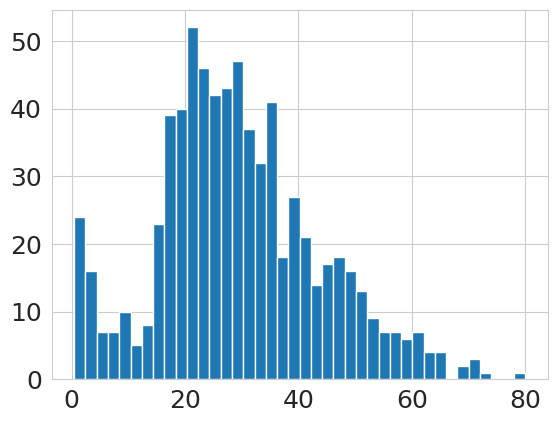

In [ ]:
pass_data.Age.hist(bins = 40)

## Редактирование DataFrame

* Переименование признаков

In [ ]:
pass_data.rename(columns={'Sex': 'Gender'}, inplace=True)
pass_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [ ]:
def get_last_name(name):
    return name.split(',')[0].strip()

last_names = pass_data['name'].apply(get_last_name)
last_names.head()

0      Allen
1    Allison
2    Allison
3    Allison
4    Allison
Name: name, dtype: object

* Добавление признака

In [ ]:
pass_data['Last_name'] = last_names
pass_data.head()

pclass  survived                                             name     Sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest Last_name  
0                     St Louis, MO     Allen  
1  Montreal, PQ / Chesterville, ON   Allison  
2  Montreal, PQ / Chesterville, ON   Allison  
3  Montreal, PQ / Chesterville, ON   Allison  
4  Montreal, PQ / Chesterville, ON   Allison

* Удаление признака

In [ ]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

pclass  survived                                             name     Sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

* Работа с пропущенными данными

Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [ ]:
pass_data['boat'].isnull().head()

0    False
1    False
2     True
3     True
4     True
Name: boat, dtype: bool

In [ ]:
pass_data[pass_data['boat'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

pclass  survived                                           name     Sex  \
0       1         1                  Allen, Miss. Elisabeth Walton  female   
1       1         1                 Allison, Master. Hudson Trevor    male   
5       1         1                            Anderson, Mr. Harry    male   
6       1         1              Andrews, Miss. Kornelia Theodosia  female   
8       1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.00      0      0   24160  211.3375       B5        S    2   NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11   NaN   
5  48.00      0      0   19952   26.5500      E12        S    3   NaN   
6  63.00      1      0   13502   77.9583       D7        S   10   NaN   
8  53.00      2      0   11769   51.4792     C101        S    D   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
8              Bayside, Queens, NY

* Сортировка объектов/признаков

In [ ]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

pclass  survived                                   name   Sex   age  \
7         1         0                 Andrews, Mr. Thomas Jr  male  39.0   
70        1         0  Chisholm, Mr. Roderick Robert Crispin  male   NaN   
125       1         0                       Fry, Mr. Richard  male   NaN   
150       1         0                  Harrison, Mr. William  male  40.0   
170       1         1                Ismay, Mr. Joseph Bruce  male  49.0   

     sibsp  parch  ticket  fare        cabin embarked boat   body  \
7        0      0  112050   0.0          A36        S  NaN    NaN   
70       0      0  112051   0.0          NaN        S  NaN    NaN   
125      0      0  112058   0.0         B102        S  NaN    NaN   
150      0      0  112059   0.0          B94        S  NaN  110.0   
170      0      0  112058   0.0  B52 B54 B56        S    C    NaN   

                        home.dest  
7                     Belfast, NI  
70   Liverpool, England / Belfast  
125                           NaN  
150                           NaN  
170                     Liverpool

In [ ]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   
111       1         1                     Fortune, Miss. Alice Elizabeth   

        Sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   
111  female  24.0      3      2     19950  263.0000  C23 C25 C27        S   

    boat  body                                       home.dest  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA  
50     3   NaN                    Germantown, Philadelphia, PA  
183    3   NaN                                             NaN  
302    3   NaN                                             NaN  
111   10   NaN                                    Winnipeg, MB

## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [ ]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [ ]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         216
        1         144
        2         106
male    3         493
        1         179
        2         171
Name: pclass, dtype: int64

In [ ]:
pass_data.groupby('pclass')['fare'].describe()

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


pclass       
1       count    323.000000
        mean      87.508992
        std       80.447178
        min        0.000000
        25%       30.695800
        50%       60.000000
        75%      107.662500
        max      512.329200
2       count    277.000000
        mean      21.179196
        std       13.607122
        min        0.000000
        25%       13.000000
        50%       15.045800
        75%       26.000000
        max       73.500000
3       count    708.000000
        mean      13.302889
        std       11.494358
        min        0.000000
        25%             NaN
        50%             NaN
        75%             NaN
        max       69.550000
Name: fare, dtype: float64

In [ ]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    28.687088
male      30.585228
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [ ]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [ ]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [ ]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

Sex  survived
0  female  0.727468
1    male  0.190985

## Сохранение данных

Также данные можно сохранить в файл:

In [ ]:
pass_data.to_csv('titanic_2.csv', index=False)

# Matplotlib

* [matplotlib](http://matplotlib.org)
* [matplotlib - 2D and 3D plotting in Python](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
* [visualization in pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

**Matplotlib** — библиотека языка Python, используемая для визуализации.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(1, 10, 20)

Для построения графиков в matplotlib используются фигуры и заданные для них оси, что довольно удобно в случае, когда необходимо строить несколько графиков или их расположение нестандартное.

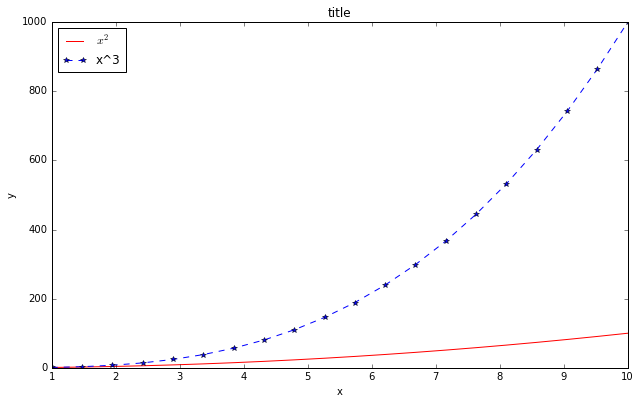

In [ ]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, x ** 2, 'r')
axes.plot(x, x ** 3, 'b*--')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
axes.legend([r'$x^2$', 'x^3'], loc = 0)

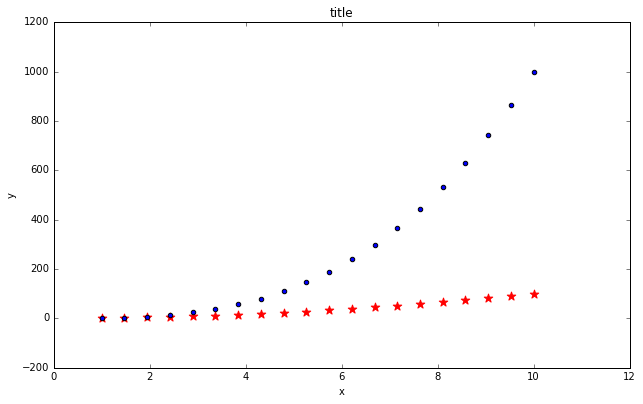

In [ ]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(x, x ** 2, color='red', marker='*', s=80)
axes.scatter(x, x ** 3)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Matplotlib позволяет настраивать многие детали создаваемых графиков:

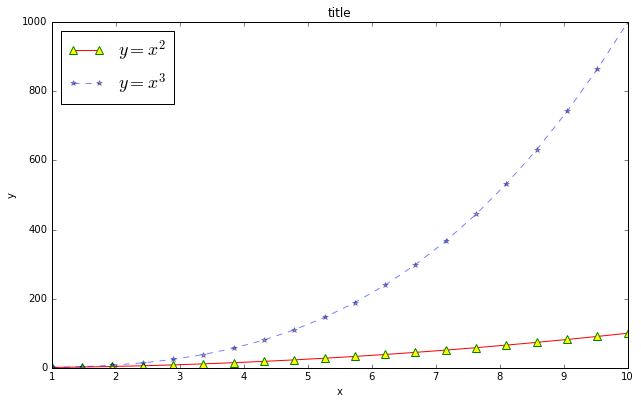

In [ ]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, x ** 2, 'r^-', label = r'$y = x^2$', markersize=8, markerfacecolor="yellow",
          markeredgewidth=1, markeredgecolor="green")
axes.plot(x, x ** 3, 'b*--', label = r'$y = x^3$', alpha = 0.5)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
axes.legend(loc = 0, fontsize = 18)

Как было упомянуто, matplotlib предоставляет определенную свободу в расположении подграфиков:

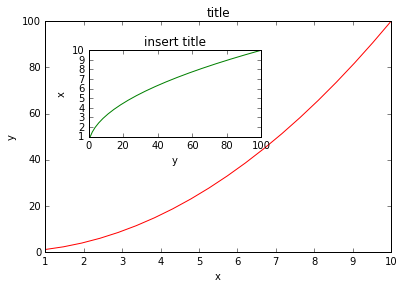

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, x ** 2, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(x ** 2, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

Впрочем, можно использовать и одну из классических конфигураций:

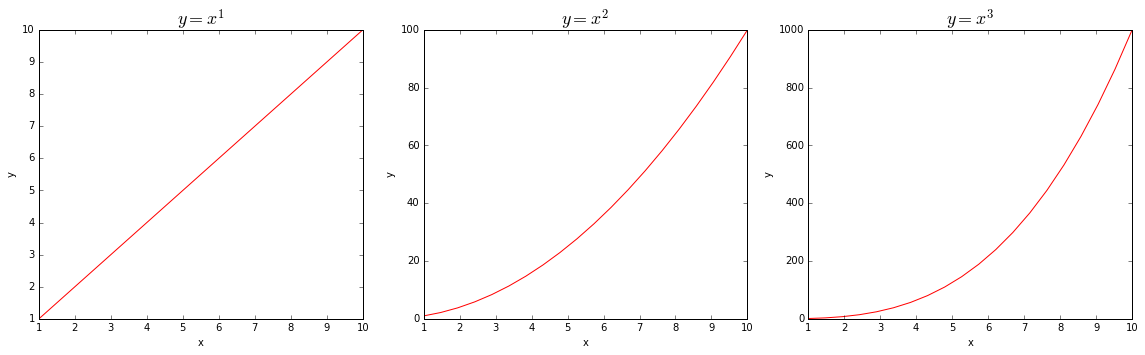

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16, 5))

for pow_num, ax in enumerate(axes):
    ax.plot(x, x ** (pow_num + 1), 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(r'$y = x^' + str(pow_num + 1)+ r'$', fontsize = 18)
fig.tight_layout() # борьба с пересечением подграфиков

Получившийся график можно сохранить в файл:

In [ ]:
fig.savefig("pows.png", dpi=200)

Matplotlib также позволяет строить surface plot, используя значения функции в узлах сетки:

In [ ]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

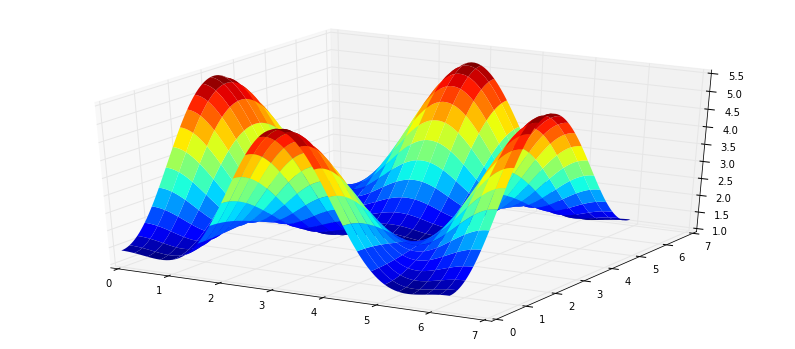

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(111, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, cmap='jet')

Кроме того, можно строить более детализированные гистограммы по сравнению с теми, что мы рассмотрели ранее:

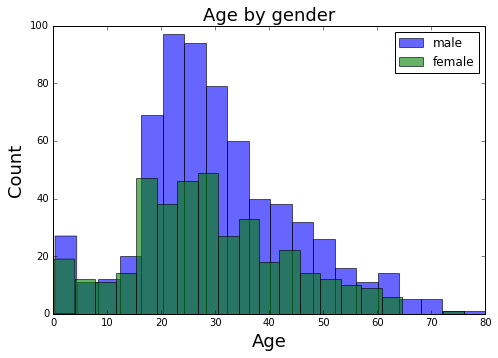

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 20
index = np.arange(bins)
axes.hist(pass_data[pass_data['Sex'] == 'male']['age'].dropna(), bins=bins, alpha=0.6, label='male')
axes.hist(pass_data[pass_data['Sex'] == 'female']['age'].dropna(), bins=bins, alpha=0.6, label='female')

axes.legend()
axes.set_xlabel('Age', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Age by gender', fontsize=18)

Заметим также, что Matplotlib позволяет использовать многие другие типы визуализации, подробнее про них можно почитать, например, [здесь](http://matplotlib.org/gallery.html) или [здесь](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).